<!DOCTYPE html>
<html>
<head>
<title>Cohort Analysis in Python</title>
</head>
<body>
<h1>Cohort Analysis in Python: A Comprehensive Guide</h1>
<p>This repository provides a step-by-step guide to performing cohort analysis in Python. Leveraging the power of Pandas, you'll learn how to create customer cohorts, calculate essential metrics, and visualize trends to extract valuable insights from your e-commerce data.</p>
<h2>Key Topics Covered:</h2>
<ul>
<li>Introduction to cohort analysis</li>
<li>Cohort creation and manipulation</li>
<li>Calculation of key metrics (retention, average order value)</li>
<li>Data visualization techniques</li>
<li>Practical applications and use cases</li>
</ul>
<h2>Prerequisites:</h2>
<ul>
<li>Basic Python programming knowledge</li>
<li>Familiarity with Pandas library</li>
</ul>
<p>By the end of this guide, you'll be equipped to conduct in-depth cohort analyses and extract actionable insights from your e-commerce data.</p>
    
<p>The granularity of this cohort analysis is month.</p>
</body>
</html>


<h1>Import packages</h1>

In [1]:
import pandas as pd
# import missingno as msno
from textwrap import wrap
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib as mpl
from cycler import cycler

import numpy as np
import os as os
import time
import pprint
import sys
import re
import json
import itertools
import datetime as dt


<h1>Set up</h1>

In [2]:
cwd=os.getcwd()
# print(cwd)

In [3]:
!conda list -> txt/cohort.txt

<h1>Import data</h1>

In [4]:
online = pd.read_csv(f'data/online.csv', header=0, sep=',', index_col=0,
                     parse_dates=['InvoiceDate'])
# date_format="%Y-%m-%d %H:%M:%S"

<h1>Inspecting the data</h1>

In [5]:
print(online.shape)

(70864, 8)


In [6]:
print(online.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [7]:
print(online.info())

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB
None


In [8]:
print(online.head(2))

        InvoiceNo StockCode                    Description  Quantity  \
416792     572558     22745     POPPY'S PLAYHOUSE BEDROOM          6   
482904     577485     23196  VINTAGE LEAF MAGNETIC NOTEPAD         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
416792 2011-10-25 08:26:00       2.10       14286  United Kingdom  
482904 2011-11-20 11:56:00       1.45       16360  United Kingdom  


In [9]:
print(online.dtypes)

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


In [10]:
var_n = online.select_dtypes(include='number').describe()
var_n 

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,70864.000000,70864.000000,70864.000000,70864.00000
mean,560639.843136,11.511233,3.063033,15552.19790
std,13176.494003,41.017582,31.894970,1595.50593
min,536365.000000,1.000000,0.001000,12747.00000
25%,549128.000000,2.000000,1.250000,14194.00000
50%,562012.500000,4.000000,1.950000,15525.00000
75%,572283.000000,12.000000,3.750000,16931.00000
max,581586.000000,4300.000000,8142.750000,18287.00000


<h3>Inspect dates</h3>

In [11]:
online['InvoiceDate'].describe()

count                            70864
mean     2011-07-11 01:25:32.900767744
min                2010-12-01 08:26:00
25%                2011-04-06 14:25:00
50%                2011-08-01 13:59:30
75%                2011-10-23 11:42:00
max                2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

In [12]:
days=online['InvoiceDate'].dt.day
dates=online['InvoiceDate'].dt.date
years=online['InvoiceDate'].dt.year
months=online['InvoiceDate'].dt.month


print(dates.sort_values()[:5])
print('----------------------------------')
print(dates.sort_values().tail())
print('----------------------------------')
print(months.value_counts().sort_values())
print('----------------------------------')
print(years.value_counts())

2306    2010-12-01
1151    2010-12-01
2428    2010-12-01
2089    2010-12-01
686     2010-12-01
Name: InvoiceDate, dtype: object
----------------------------------
541572    2011-12-09
541850    2011-12-09
540408    2011-12-09
541615    2011-12-09
540412    2011-12-09
Name: InvoiceDate, dtype: object
----------------------------------
InvoiceDate
1      3580
2      3648
4      4148
7      4610
6      4669
8      4744
3      4764
5      5018
9      7189
12     8042
10     8808
11    11644
Name: count, dtype: int64
----------------------------------
InvoiceDate
2011    65971
2010     4893
Name: count, dtype: int64


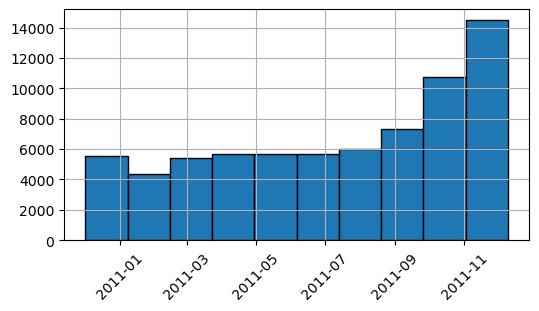

In [13]:
online['InvoiceDate'].hist(edgecolor='black', figsize=(6,3))
plt.xticks(rotation=45)
plt.show()

C:\Users\gamarandor\miniconda3\envs\data_analytics\lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
C:\Users\gamarandor\miniconda3\envs\data_analytics\lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


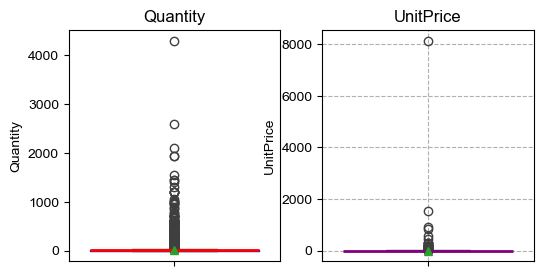

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

sns.set_style('whitegrid')

# Define colors for box elements
box_color = 'blue'
median_color = 'red'
whisker_color = 'gray'

# Apply colors to boxplot elements
ax1 = sns.boxplot(
    data=online,
    y='Quantity',
    ax=ax1,
    showmeans=True, 
    boxprops=dict(color=box_color),
    medianprops=dict(linewidth=2, color=median_color),
    whiskerprops=dict(color=whisker_color),
)
ax1.set_title('Quantity')


ax2 = sns.boxplot(
    data=online,
    y='UnitPrice',
    ax=ax2,
    showmeans=True,
    boxprops=dict(color='orange'),
    medianprops=dict(linewidth=2, color='purple'),
    whiskerprops=dict(color='green'),
)
ax2.set_title('UnitPrice')

fig = plt.grid(linestyle='dashed')

plt.show()


<h3>Outliers</h3>

In [15]:
online_sample = online.sample(frac=0.25)
print(online_sample.shape)

(17716, 8)


In [16]:
# Create a copy of the online DataFrame
online_2 = online.copy()

online_2.replace([np.inf, -np.inf], np.nan, inplace=True)
online_2.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Create a boolean mask for filtering
boolean_mask_2 = \
(online_2['Quantity'] <= 1000) & (online_2['UnitPrice'] <= 1000)

# Apply the mask to filter the DataFrame
online_2 = online_2[boolean_mask_2]

# Display information about the filtered DataFrame
online_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70844 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70844 non-null  int64         
 1   StockCode    70844 non-null  object        
 2   Description  70844 non-null  object        
 3   Quantity     70844 non-null  int64         
 4   InvoiceDate  70844 non-null  datetime64[ns]
 5   UnitPrice    70844 non-null  float64       
 6   CustomerID   70844 non-null  int64         
 7   Country      70844 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB


C:\Users\gamarandor\miniconda3\envs\data_analytics\lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
C:\Users\gamarandor\miniconda3\envs\data_analytics\lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


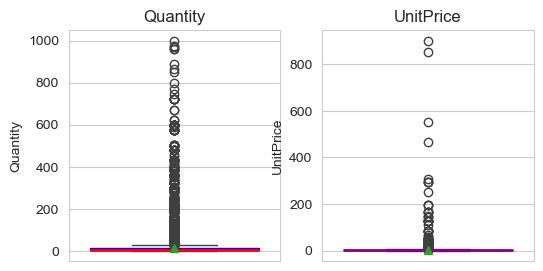

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

sns.set_style('whitegrid')

# Define colors for box elements
box_color = 'blue'
median_color = 'red'
whisker_color = 'gray'

# Apply colors to boxplot elements
ax1 = sns.boxplot(
    data=online_2,
    y='Quantity',
    ax=ax1,
    showmeans=True, 
    boxprops=dict(color=box_color),
    medianprops=dict(linewidth=2, color=median_color),
    whiskerprops=dict(color=whisker_color),
)
ax1.set_title('Quantity')


ax2 = sns.boxplot(
    data=online_2,
    y='UnitPrice',
    ax=ax2,
    showmeans=True,
    boxprops=dict(color='orange'),
    medianprops=dict(linewidth=2, color='purple'),
    whiskerprops=dict(color='green'),
)
ax2.set_title('UnitPrice')

plt.show()

In [18]:
online_3 = online_2[['InvoiceDate', 'UnitPrice', 'Quantity']]
online_3 = online_3.set_index('InvoiceDate')
print(online_3.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70844 entries, 2011-10-25 08:26:00 to 2011-08-24 14:53:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UnitPrice  70844 non-null  float64
 1   Quantity   70844 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 MB
None


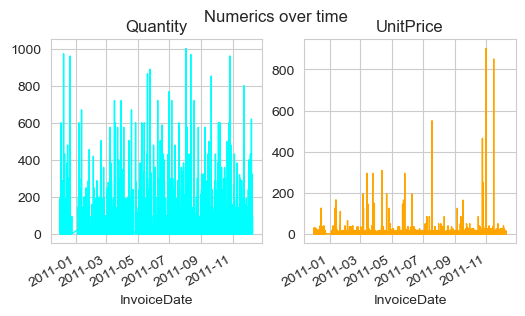

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,3))
plt.suptitle('Numerics over time')

online_3['Quantity'].plot(ax=ax1, title='Quantity', 
                          linewidth=1, color='cyan')
online_3['UnitPrice'].plot(ax=ax2, title='UnitPrice', 
                           linewidth=1, color='orange')
plt.show()

<h3>Missing values</h3>

In [20]:
online.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
online_3.isnull().sum()

UnitPrice    0
Quantity     0
dtype: int64

<h1>Cohort Analysis</h1>

In [22]:
def get_month_of_date(x): 
    return dt.datetime(x.year, x.month, 1)

In [23]:
online['InvoiceDay'] = online['InvoiceDate'].apply(get_month_of_date)


In [24]:
online[['InvoiceDay', 'InvoiceDate']].head(3)

,InvoiceDay,InvoiceDate
416792,2011-10-01,2011-10-25 08:26:00
482904,2011-11-01,2011-11-20 11:56:00
263743,2011-07-01,2011-07-14 13:35:00


<h4>Grouping by CustomerID</h4>

<p>
This gives all invoices issued for every unique customer.<br>
How many invoices did customer A received?
</p>

In [25]:
group_obj = online.groupby('CustomerID')['InvoiceDay']
print(type(group_obj))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


<p>
What is in the group obj stored?<br>
A list of invoice dates implying invoices issued for every unique customer id.
</p>

In [26]:
customer_invoice_days = {}
customer_invoice_days_len = {}

for customer, invoice_per_customer in group_obj:
    customer_invoice_days[customer] = list(invoice_per_customer)
    customer_invoice_days_len[customer] = len(list(invoice_per_customer))
    
dict(list(customer_invoice_days.items())[3:5])

{12820: [Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-10-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-10-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-12-01 00:00:00'),
  Timestamp('2011-01-01 00:00:00'),
  Timestamp('2011-10-01 00:00:00'),
  Timestamp('2011-01-01 00:00:00'),
  Timestamp('2011-10-01 00:00:00'),
  Timestamp('2011-12-01 00:00:00'),
  Timestamp('2011-12-01 00:00:00'),
  Timestamp('2011-10-01 00:00:00'),
  Timestamp('2011-10-01 00:00:00'),
  Timestamp('2011-10-01 00:00:00'),
  Timestamp('2011-12-01 00:00:00')],
 12822: [Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00'),
  Timestamp('2011-09-01 00:00:00')]}

In [27]:
n_invoices_customer = \
pd.DataFrame(customer_invoice_days_len.items(), columns=['CustomerID', 'len']).\
sort_values(by='len', ascending=False).reset_index(drop=True)


n_invoices_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerID  3701 non-null   int64
 1   len         3701 non-null   int64
dtypes: int64(2)
memory usage: 58.0 KB


In [28]:
n_invoices_customer.head()

,CustomerID,len
0,17841,1532
1,14096,1055
2,12748,967
3,14606,548
4,15311,469


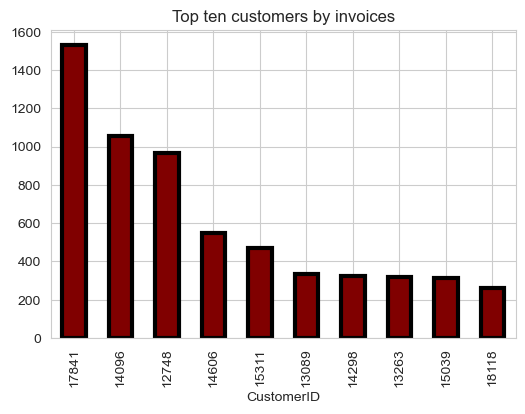

In [29]:

n_invoices_customer.head(10).plot.bar(x='CustomerID', y='len', legend=False,
                                      edgecolor='black', color='maroon', linewidth=3,
                                      xlabel='CustomerID',
                                      title='Top ten customers by invoices',
                                      figsize=(6,4))
plt.show()

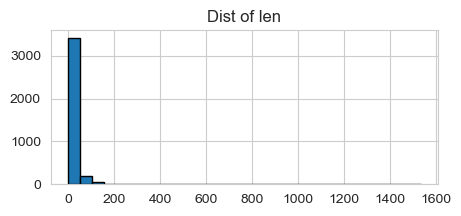

In [30]:
n_invoices_customer['len'].hist(bins=30, figsize=(5,2), edgecolor='black')
plt.title('Dist of len')
plt.show()

<h4>Selecting the minimum date value</h4>
<p>
or oldest, earliest date 
from the list of invoice dates created for every unique customer.
</p>

In [31]:
online['CohortMonth']=group_obj.transform('min')
online['CohortMonth'] = online['CohortMonth'].dt.to_period('M')
online['Cohort_number']=online['CohortMonth'].dt.month

In [32]:
online_subset_cohort_month = \
online[['CustomerID', 'InvoiceDay', 'InvoiceDate', 'CohortMonth', 'Cohort_number']]

In [33]:
online_subset_cohort_month.head(3)

,CustomerID,InvoiceDay,InvoiceDate,CohortMonth,Cohort_number
416792,14286,2011-10-01,2011-10-25 08:26:00,2011-04,4
482904,16360,2011-11-01,2011-11-20 11:56:00,2011-09,9
263743,13933,2011-07-01,2011-07-14 13:35:00,2011-07,7


In [34]:
cohort_size = online_subset_cohort_month['Cohort_number'].value_counts()
cohort_size.index.name = 'Cohort name and size'
cohort_size.head()

Cohort name and size
12    29087
1      8398
3      6396
2      5794
4      3540
Name: count, dtype: int64

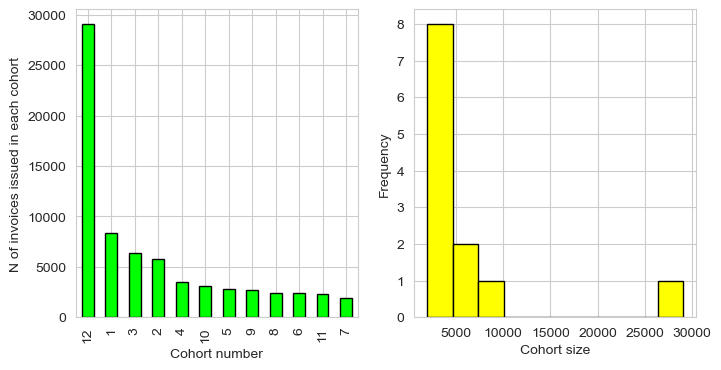

In [35]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(8,4))

cohort_size.plot.bar(ax=ax1, xlabel='Cohort number', ylabel='N of invoices issued in each cohort',
                     edgecolor='black', color='lime')
cohort_size.plot.hist(ax=ax2, edgecolor='black', color='yellow', xlabel='Cohort size')
plt.show()

<h4>Calculating the time-offset</h4>

<p>
The goal is to understand user behavior, when they making a buying decision, <br>
relative to the time of their first purchase.
</p>

<p>
<b>What is the time offset?</b><br>
The difference between the transaction time and the reference time is the time offset.<br>
The reference time is the time the user made the first action.<br>
In this case received the first invoice, <br>
signalling the first purchase an invoice was issued for.
</p>


</p>
This was calculated with "online['CohortMonth']=group_obj.transform('min')".<br>
The transaction time is the time the same user received an invoice <br> 
at anytime in the future along the timeline of the cohorts.<br>
In the example below the granularity is days.<br>
</p>

<p>

<p>
<b>What do we need to do at first?</b><br>
As stated the time offset is calculated by subtracting<br>
the reference date from the transaction date for each cohort.<br>
We need a function to extract the time components in a clear, transparent and concise way.
</p>

In [36]:
def get_date_components(df, date_col):
    """ returns extracted year, month, day from a datetime var. 
        It throws an error if not datetime."""
    
    try:
        pd.api.types.is_datetime64_dtype(df[date_col])
    except (TypeError):
        return 'TypeError'
        
    
    year = df[date_col].dt.year
    month = df[date_col].dt.month
    day = df[date_col].dt.day
    
    return year, month, day
    
print(help(get_date_components))

Help on function get_date_components in module __main__:

get_date_components(df, date_col)
    returns extracted year, month, day from a datetime var. 
    It throws an error if not datetime.

None


<h4>Invoice compos</h4>

<p>
Looking into it.
</p>


In [37]:
invoice_year, invoice_month, invoice_day = get_date_components(online, 'InvoiceDate')

In [38]:
df_invoice_compos = \
pd.DataFrame(list(zip(invoice_year, invoice_month, invoice_day)), 
             columns=['invoice_year', 'invoice_month', 'invoice_day'])


print(df_invoice_compos.head())

print('---------------------------------------------------------')

df_invoice_compos['invoice_year'].value_counts()

   invoice_year  invoice_month  invoice_day
0          2011             10           25
1          2011             11           20
2          2011              7           14
3          2011             11           23
4          2011              5           25
---------------------------------------------------------


invoice_year
2011    65971
2010     4893
Name: count, dtype: int64

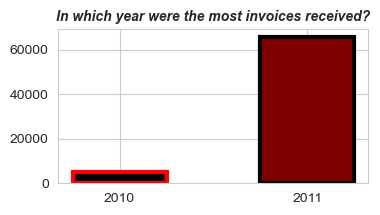

In [39]:
vc_invoice_compo_year = df_invoice_compos['invoice_year'].value_counts()

plt.figure(figsize=(4, 2))

plt.bar(vc_invoice_compo_year.index, vc_invoice_compo_year, 
        edgecolor=['black', 'red'], linewidth=3,
        color=['maroon', 'black'], width=0.5)

plt.xticks(ticks=[2011, 2010], labels=['2011', '2010'])

plt.title('In which year were the most invoices received?', fontsize=10, fontstyle='oblique',
           weight='bold')

plt.show()

<h4>Cohort compos</h4>

<p>
Understand the extracted compos by looking into it.
</p>

In [40]:
# online.info()
# online.head()

cohort_year, cohort_month, cohort_day = \
get_date_components(df=online, date_col='CohortMonth')

In [41]:
df_cohort_compos = \
pd.DataFrame(list(zip(cohort_year, cohort_month, cohort_month)),
             columns=['cohort_year', 'cohort_month', 'cohort_day'])

df_cohort_compos.head()

,cohort_year,cohort_month,cohort_day
0,2011,4,4
1,2011,9,9
2,2011,7,7
3,2011,11,11
4,2011,2,2


In [42]:
vc_month_cohorts =df_cohort_compos.cohort_month.value_counts().sort_index()
print(vc_month_cohorts)

cohort_month
1      8398
2      5794
3      6396
4      3540
5      2753
6      2388
7      1927
8      2394
9      2740
10     3096
11     2351
12    29087
Name: count, dtype: int64


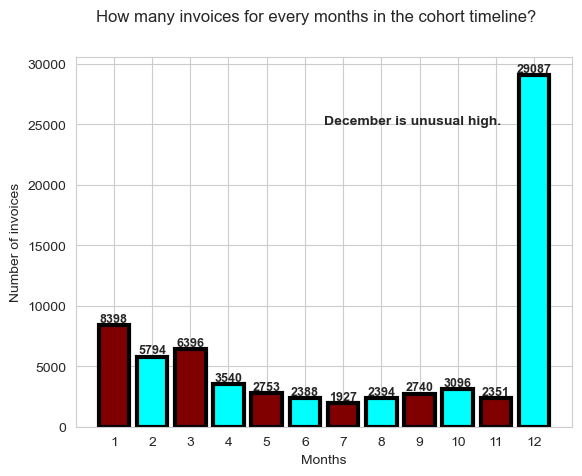

In [43]:
plt.figure()

plt.suptitle('How many invoices for every months in the cohort timeline?')

fig.add_subplot(1,1,1)

plt.bar(x=vc_month_cohorts.index.tolist(), height=vc_month_cohorts, 
        edgecolor='black', linewidth=3, color=['maroon', 'cyan'])

plt.xticks(ticks=vc_month_cohorts.index.tolist(),  labels=vc_month_cohorts.index.tolist())
plt.xlabel('Months')
plt.ylabel('Number of invoices')

for e, v in enumerate(vc_month_cohorts):
    plt.text(e+1, v+1.1, f'{v}', fontsize=9, weight='bold', ha='center', va='bottom')
    
plt.annotate(text='December is unusual high.', 
             xy=(6.5, 25000), weight='bold')

plt.show()

<p>Going ahead after have looked into the extracted compos.</p>

<h4>Time offset</h4>


<p>
Checking out below the invoice_year and cohort_year variables.
</p>

In [44]:
# invoice_year, invoice_month, invoice_day = get_date_components(online, 'InvoiceDate')
# cohort_year, cohort_month, cohort_month = get_date_components(df=online, date_col='CohortMonth')

year_df = pd.DataFrame(list(zip(invoice_year, cohort_year)), 
                       columns=['invoice_year', 'cohort_year'])

year_df['Match?'] = np.where(year_df['invoice_year'] == year_df['cohort_year'], 1, 0 ) 
n_matches = year_df['Match?'].sum()

print(f'Number of matches: {n_matches}')
print('----------------------------------------------')
print(year_df['Match?'].value_counts())

# print(year_df.info())

Number of matches: 46878
----------------------------------------------
Match?
1    46878
0    23986
Name: count, dtype: int64


In [45]:
differences_years = invoice_year - cohort_year

print(type(differences_years))
print('----------------------') 
print(len(differences_years))
print('----------------------') 
print(differences_years.sum())
print('----------------------') 
print(differences_years[:5])

<class 'pandas.core.series.Series'>
----------------------
70864
----------------------
23986
----------------------
416792    0
482904    0
263743    0
495549    0
204384    0
dtype: int64


In [46]:
differences_month = invoice_month - cohort_month

print(type(differences_month))
print('----------------------') 
print(len(differences_month))
print('----------------------') 
print(differences_month.sum())
print('----------------------') 
print(differences_month[:5])

<class 'pandas.core.series.Series'>
----------------------
70864
----------------------
-2138
----------------------
416792    6
482904    2
263743    0
495549    0
204384    3
dtype: int64


<p>
It is possible for months_diff to be negative in the calculation 
if the invoice_month is earlier in the year than the cohort_month. 
This situation can occur when an invoice date falls in an earlier month 
of a later year compared to the cohort month. 
The formula to calculate the cohort index or time offset should account for this. 
</p>

In [47]:
differences_day = invoice_day - cohort_month

print(len(differences_day))
print('----------------------') 
print(differences_day.sum())
print('----------------------') 
print(differences_day[:5])

70864
----------------------
520040
----------------------
416792    21
482904    11
263743     7
495549    12
204384    23
dtype: int64


<h3>Cohort Index</h3>

<p>
which is is the time setoff or the difference between transaction<br>
and reference in the choosen 
time period granularity:<br>
day, weeks, months, quarter, years.
</p>

<p>
<b>What is the granularity of the time offset?</b><br>
It is the time period in which the time offset is expressed.<br>
Usual time periods are for example years, quarter, month, weeks, days.<br>
The granularity here is months.<br>
All time differences of a date "2011-03-28",<br> 
must be converted to months.<br>
A year has 12 months therefore the conversion is "year difference * 12". 
</p>


In [48]:
online['CohortIndex']=differences_years*12 + differences_month+ 1

print(online.info())
print(online['CohortIndex'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 416792 to 312243
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      70864 non-null  int64         
 1   StockCode      70864 non-null  object        
 2   Description    70864 non-null  object        
 3   Quantity       70864 non-null  int64         
 4   InvoiceDate    70864 non-null  datetime64[ns]
 5   UnitPrice      70864 non-null  float64       
 6   CustomerID     70864 non-null  int64         
 7   Country        70864 non-null  object        
 8   InvoiceDay     70864 non-null  datetime64[ns]
 9   CohortMonth    70864 non-null  period[M]     
 10  Cohort_number  70864 non-null  int64         
 11  CohortIndex    70864 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3), period[M](1)
memory usage: 7.0+ MB
None
416792    7
482904    3
263743    1
495549    1
204384    4
Name: CohortInde

<h4>How many cohorts or unique cohort index number are there?</h4>

In [49]:
invoice_date_range = online['InvoiceDate'].max() - online['InvoiceDate'].min() 

print(invoice_date_range)
print(len(online['CohortIndex'].unique()))

373 days 04:23:00
13


<p>
Adding +1 to the CohortIndex calculation is a standard approach to make the periods more intuitive and to ensure that the first period starts at 1. This helps in making the cohort analysis more readable and consistent.
</p>

In [50]:
online.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'CohortMonth',
       'Cohort_number', 'CohortIndex'],
      dtype='object')

In [51]:
cohort_features = online[['CustomerID', 'CohortMonth', 'Cohort_number', 'CohortIndex']]
print(cohort_features.info())

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 416792 to 312243
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   CustomerID     70864 non-null  int64    
 1   CohortMonth    70864 non-null  period[M]
 2   Cohort_number  70864 non-null  int64    
 3   CohortIndex    70864 non-null  int64    
dtypes: int64(3), period[M](1)
memory usage: 2.7 MB
None


In [52]:
grouping_cohort_data = online.groupby(['CohortMonth', 'CohortIndex'])

grouping_cohort_data_dict = dict()

for a, b in grouping_cohort_data:
    grouping_cohort_data_dict[a] = b

# dict(list(customer_invoice_days.items())[3:5])
dict(list(grouping_cohort_data_dict.items())[2:3])

{(Period('2010-12', 'M'),
  3):         InvoiceNo StockCode                         Description  Quantity  \
 90005      543984     21873     IF YOU CAN'T STAND THE HEAT MUG        12   
 96402      544565     22228     BUNNY WOODEN PAINTED WITH BIRD         12   
 85515      543474    85099F                JUMBO BAG STRAWBERRY         6   
 95180      544448     20856    DENIM PATCH PURSE PINK BUTTERFLY         3   
 84077      543369     22720   SET OF 3 CAKE TINS PANTRY DESIGN          1   
 ...           ...       ...                                 ...       ...   
 90396      544037     21210  SET OF 72 RETROSPOT PAPER  DOILIES        12   
 95092      544445     21621          VINTAGE UNION JACK BUNTING         2   
 102479     545022     22566  FELTCRAFT HAIRBAND PINK AND PURPLE        12   
 93687      544305     22423            REGENCY CAKESTAND 3 TIER         3   
 95506      544460     22568               FELTCRAFT CUSHION OWL         2   
 
                InvoiceDate  Un

In [53]:
cohort_data = grouping_cohort_data['CustomerID'].apply(pd.Series.nunique)


print(type(cohort_data))
print('--------------------------')
print(type(cohort_data.index))
print('--------------------------')
print(cohort_data)

<class 'pandas.core.series.Series'>
--------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>
--------------------------
CohortMonth  CohortIndex
2010-12      1              716
             2              246
             3              221
             4              251
             5              245
                           ... 
2011-10      2               67
             3               30
2011-11      1              291
             2               32
2011-12      1               38
Name: CustomerID, Length: 91, dtype: int64


<p>
Interpretation:<br>
At 2010-12-01 there were 69 unique users in cohort 1.
</p>

In [54]:
cohort_data = cohort_data.reset_index()
print(cohort_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   CohortMonth  91 non-null     period[M]
 1   CohortIndex  91 non-null     int64    
 2   CustomerID   91 non-null     int64    
dtypes: int64(2), period[M](1)
memory usage: 2.3 KB
None


In [55]:
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12,1,716
1,2010-12,2,246
2,2010-12,3,221
3,2010-12,4,251
4,2010-12,5,245


In [56]:
cohort_data['CohortIndex'].describe()

count    91.000000
mean      5.000000
std       3.179797
min       1.000000
25%       2.000000
50%       4.000000
75%       7.000000
max      13.000000
Name: CohortIndex, dtype: float64

In [57]:
cohort_table_counts = \
cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_table_counts.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 13 entries, 2010-12 to 2011-12
Freq: M
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       13 non-null     float64
 1   2       12 non-null     float64
 2   3       11 non-null     float64
 3   4       10 non-null     float64
 4   5       9 non-null      float64
 5   6       8 non-null      float64
 6   7       7 non-null      float64
 7   8       6 non-null      float64
 8   9       5 non-null      float64
 9   10      4 non-null      float64
 10  11      3 non-null      float64
 11  12      2 non-null      float64
 12  13      1 non-null      float64
dtypes: float64(13)
memory usage: 1.4 KB


In [58]:
cohort_table_counts.iloc[0:10, 0:5]

CohortIndex,1,2,3,4,5
CohortMonth,,,,,
2010-12,716.0,246.0,221.0,251.0,245.0
2011-01,332.0,69.0,82.0,81.0,110.0
2011-02,316.0,58.0,57.0,83.0,85.0
2011-03,388.0,63.0,100.0,76.0,83.0
2011-04,255.0,49.0,52.0,49.0,47.0
2011-05,249.0,40.0,43.0,36.0,52.0
2011-06,207.0,33.0,26.0,41.0,49.0
2011-07,173.0,28.0,31.0,38.0,44.0
2011-08,139.0,30.0,28.0,35.0,14.0


In [59]:
cohort_table_counts.iloc[0:5, 200:205]

CohortIndex
CohortMonth
2010-12
2011-01
2011-02
2011-03
2011-04


In [60]:
cohort_table_counts.iloc[300:305, 0:5]

CohortIndex,1,2,3,4,5
CohortMonth,,,,,


In [61]:
cohort_table_counts.isnull().sum()

CohortIndex
1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
dtype: int64

<p>
The high number of NaN-null-values indicates that there were no purchases at that day.<br>
This is expected, when granularity is high like in the day period.<br>
There are days, when no customer made a purchase.<br>
If the granularity is even higher like seconds, it is clearer that there are seconds, when no
purchase happened.
</p>

In [62]:
cohort_table_2_nv = cohort_table_counts.copy()

cohort_table_2_nv = cohort_table_2_nv.fillna(0)

cohort_table_2_nv.isnull().sum().sum()

0

<h4>Data visualization of the cohort table</h4>

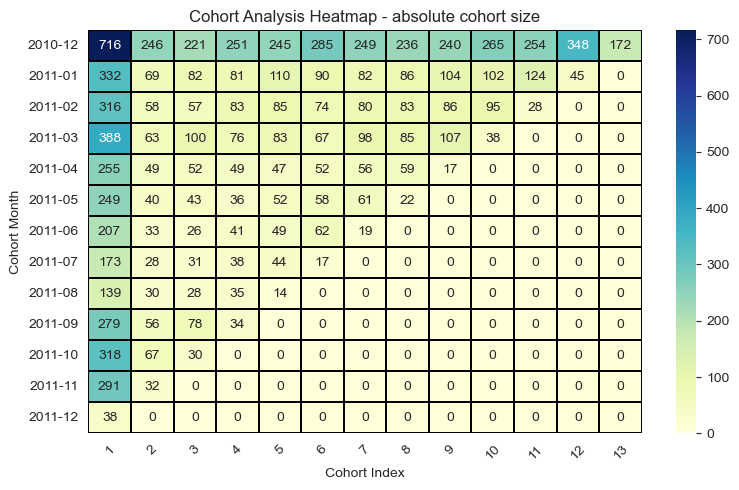

In [63]:
cohort_sample = cohort_table_2_nv.sample(frac=0.1, random_state=45, axis=0)


plt.figure(figsize=(8, 5))
sns.heatmap(cohort_table_2_nv, annot=True, fmt='.0f', 
            cmap='YlGnBu', linewidths=.1, linecolor='black')
plt.title('Cohort Analysis Heatmap - absolute cohort size')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<h2>Calculating retention rate</h2>

In [64]:
cohort_retention = cohort_table_2_nv.copy()

In [65]:
cohort_sizes = cohort_retention.iloc[:,0]

cohort_sizes 

CohortMonth
2010-12    716.0
2011-01    332.0
2011-02    316.0
2011-03    388.0
2011-04    255.0
2011-05    249.0
2011-06    207.0
2011-07    173.0
2011-08    139.0
2011-09    279.0
2011-10    318.0
2011-11    291.0
2011-12     38.0
Freq: M, Name: 1, dtype: float64

In [66]:
retention = cohort_retention.divide(cohort_sizes, axis=0)

# print(retention.info())
print(retention)

CohortIndex   1         2         3         4         5         6         7   \
CohortMonth                                                                    
2010-12      1.0  0.343575  0.308659  0.350559  0.342179  0.398045  0.347765   
2011-01      1.0  0.207831  0.246988  0.243976  0.331325  0.271084  0.246988   
2011-02      1.0  0.183544  0.180380  0.262658  0.268987  0.234177  0.253165   
2011-03      1.0  0.162371  0.257732  0.195876  0.213918  0.172680  0.252577   
2011-04      1.0  0.192157  0.203922  0.192157  0.184314  0.203922  0.219608   
2011-05      1.0  0.160643  0.172691  0.144578  0.208835  0.232932  0.244980   
2011-06      1.0  0.159420  0.125604  0.198068  0.236715  0.299517  0.091787   
2011-07      1.0  0.161850  0.179191  0.219653  0.254335  0.098266  0.000000   
2011-08      1.0  0.215827  0.201439  0.251799  0.100719  0.000000  0.000000   
2011-09      1.0  0.200717  0.279570  0.121864  0.000000  0.000000  0.000000   
2011-10      1.0  0.210692  0.094340  0.

In [67]:
retention_rates = retention.round(3)*100
retention_rates = retention_rates.fillna(0)
print(retention_rates.iloc[:4, :6])
#print(retention_rates)

CohortIndex      1     2     3     4     5     6
CohortMonth                                     
2010-12      100.0  34.4  30.9  35.1  34.2  39.8
2011-01      100.0  20.8  24.7  24.4  33.1  27.1
2011-02      100.0  18.4  18.0  26.3  26.9  23.4
2011-03      100.0  16.2  25.8  19.6  21.4  17.3


In [86]:
retention_rates.describe().round(2)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
count,13.0,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,100.0,17.77,17.32,16.79,16.47,14.70,12.75,10.69,9.72,8.28,6.28,4.78,1.85
std,0.0,7.59,9.69,11.09,12.93,13.88,13.40,13.09,14.20,14.21,13.59,13.69,6.66
min,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,100.0,16.10,12.60,12.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,100.0,18.40,18.00,19.60,20.90,17.30,9.20,0.00,0.00,0.00,0.00,0.00,0.00
75%,100.0,20.80,24.70,24.40,25.40,23.40,24.70,23.10,27.20,9.80,0.00,0.00,0.00
max,100.0,34.40,30.90,35.10,34.20,39.80,34.80,33.00,33.50,37.00,37.30,48.60,24.00


In [87]:
monthly_retention_summary = retention_rates.mean(axis=0)
print(monthly_retention_summary)

CohortIndex
1     100.000000
2      17.769231
3      17.315385
4      16.792308
5      16.469231
6      14.700000
7      12.753846
8      10.692308
9       9.715385
10      8.276923
11      6.284615
12      4.784615
13      1.846154
dtype: float64


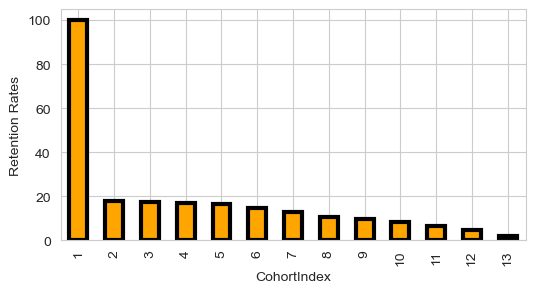

In [93]:
monthly_retention_summary.plot.bar(figsize=(6,3), edgecolor='black',
                                   linewidth=3, ylabel='Retention Rates',
                                   color=['orange'])
plt.show()

<h3>Data visualization of retention rates</h3>

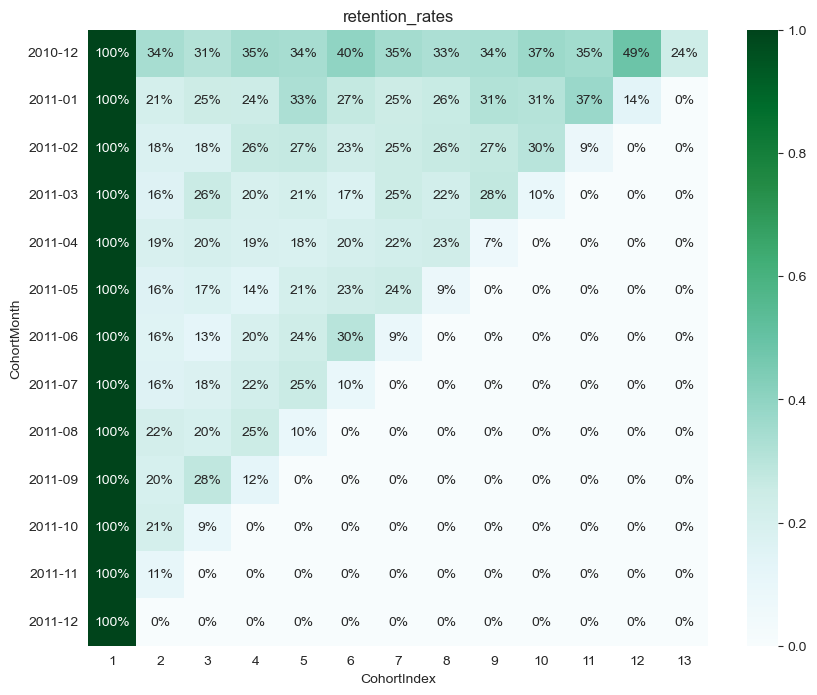

In [68]:
plt.figure(figsize=(10, 8))
plt.title('retention_rates')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 1,
cmap = 'BuGn')
plt.show()

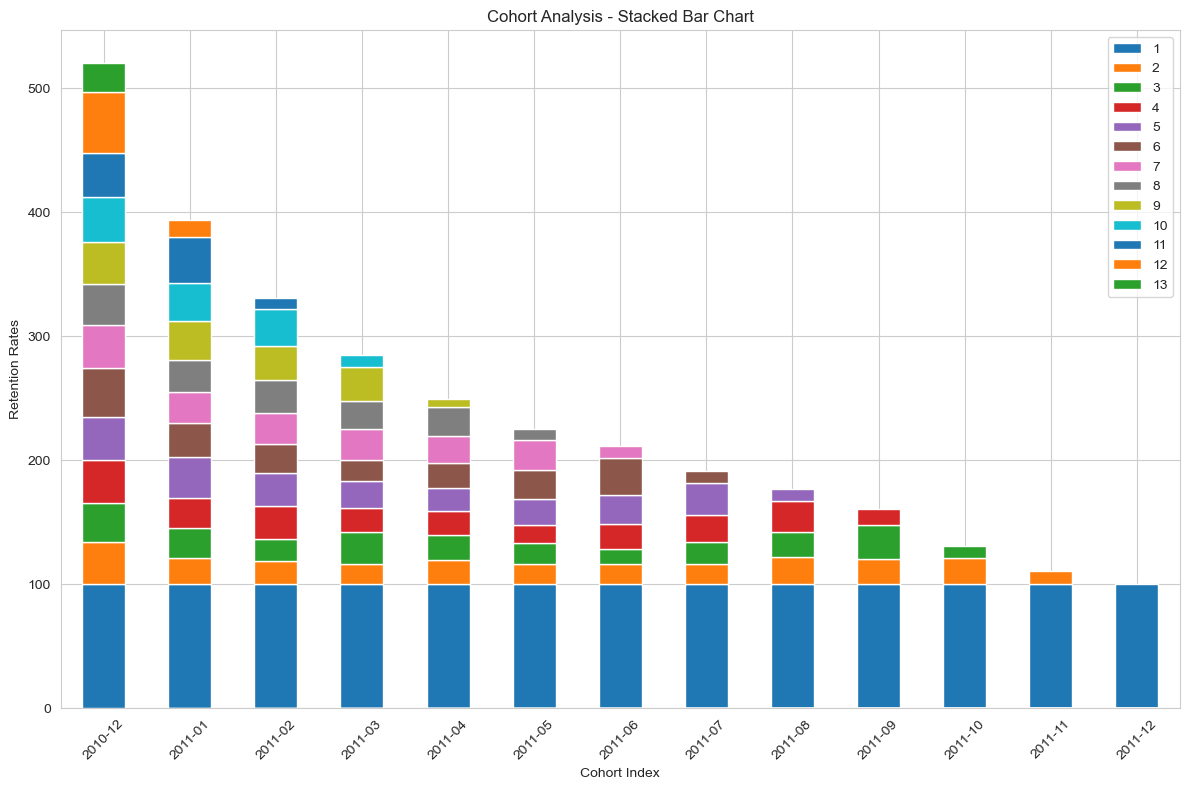

In [69]:
retention_rates.iloc[:20, :50].plot(kind='bar', stacked=True, figsize=(12, 8),
                                    legend=False)
plt.title('Cohort Analysis - Stacked Bar Chart')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rates')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<h3>Calculating average quantity</h3>

In [70]:
print(online.columns.tolist())
grouping_avq = online.groupby(['CohortMonth', 'CohortIndex'])

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'CohortMonth', 'Cohort_number', 'CohortIndex']


In [71]:
cohort_data_avg = grouping_avq['Quantity'].mean()
print(cohort_data_avg[:100])

CohortMonth  CohortIndex
2010-12      1              11.111588
             2              12.260241
             3              12.152314
             4              13.228676
             5              13.669839
                              ...    
2011-10      2               7.452211
             3               5.987654
2011-11      1               7.840920
             2               7.145455
2011-12      1              21.336538
Name: Quantity, Length: 91, dtype: float64


In [72]:
cohort_data_avg = cohort_data_avg.reset_index()

print(cohort_data_avg[:3])

  CohortMonth  CohortIndex   Quantity
0     2010-12            1  11.111588
1     2010-12            2  12.260241
2     2010-12            3  12.152314


In [73]:
avg_quantity_table = cohort_data_avg.pivot(index='CohortMonth',
                                           columns='CohortIndex',
                                           values = 'Quantity')

In [74]:
avg_quantity_table = avg_quantity_table.fillna(0).round(2)

In [75]:
avg_quantity_table.isnull().sum().sum()

0

In [76]:
print(avg_quantity_table.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 13 entries, 2010-12 to 2011-12
Freq: M
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       13 non-null     float64
 1   2       13 non-null     float64
 2   3       13 non-null     float64
 3   4       13 non-null     float64
 4   5       13 non-null     float64
 5   6       13 non-null     float64
 6   7       13 non-null     float64
 7   8       13 non-null     float64
 8   9       13 non-null     float64
 9   10      13 non-null     float64
 10  11      13 non-null     float64
 11  12      13 non-null     float64
 12  13      13 non-null     float64
dtypes: float64(13)
memory usage: 1.4 KB
None


In [77]:
print(avg_quantity_table.iloc[:4, :6])

CohortIndex      1      2      3      4      5      6
CohortMonth                                          
2010-12      11.11  12.26  12.15  13.23  13.67  11.29
2011-01      10.88  10.77   9.98  10.12  14.34  13.16
2011-02      12.12  14.30  10.60  11.48  17.47  12.15
2011-03       9.56  14.24  12.97  10.17  16.11  12.66


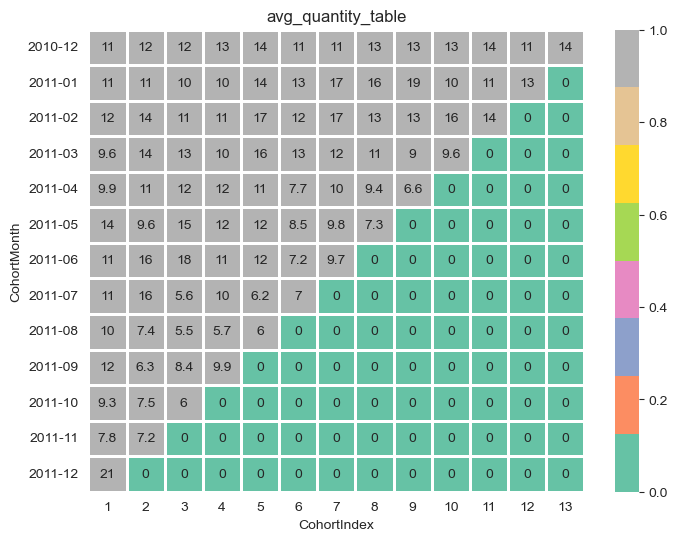

In [100]:
plt.figure(figsize=(8, 6))
plt.title('avg_quantity_table')
sns.heatmap(data = avg_quantity_table,
annot = True,
# fmt = '.0%',
vmin = 0.0,
vmax = 1,
cmap = "Set2",
linewidth=2)
plt.show()

<h3>Calculating average unit price</h3>

In [79]:
grouping_unitprice = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_unitprice = grouping_unitprice['UnitPrice'].mean()
cohort_data_unitprice = cohort_data_unitprice.reset_index()

unitprice_pivot = \
cohort_data_unitprice.pivot(index='CohortMonth', 
                                  columns='CohortIndex', 
                                  values='UnitPrice')

unitprice_pivot = unitprice_pivot.fillna(0).round(2)

In [80]:
cohort_data_unitprice.head()

,CohortMonth,CohortIndex,UnitPrice
0,2010-12,1,3.035915
1,2010-12,2,3.044060
2,2010-12,3,2.995071
3,2010-12,4,2.835175
4,2010-12,5,2.727067


In [81]:
unitprice_pivot#.iloc[:8, :8]

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,3.04,3.04,3.00,2.84,2.73,6.92,2.80,2.98,2.72,2.66,2.97,2.84,2.63
2011-01,3.16,3.14,2.96,3.01,3.13,3.03,2.97,2.46,2.71,2.92,2.55,2.01,0.00
2011-02,3.09,3.95,3.31,2.92,3.28,2.92,2.81,2.68,2.91,2.73,3.08,0.00,0.00
2011-03,3.53,3.62,3.51,2.76,2.74,2.47,2.65,2.91,2.54,2.44,0.00,0.00,0.00
2011-04,3.30,4.44,3.41,2.58,2.84,2.78,2.84,2.63,2.61,0.00,0.00,0.00,0.00
2011-05,3.12,2.77,2.48,2.72,2.45,2.31,2.70,2.29,0.00,0.00,0.00,0.00,0.00
2011-06,2.79,2.44,2.69,3.13,2.48,2.42,2.50,0.00,0.00,0.00,0.00,0.00,0.00
2011-07,3.18,3.11,3.38,2.51,2.38,2.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2011-08,2.88,3.66,5.38,6.85,4.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


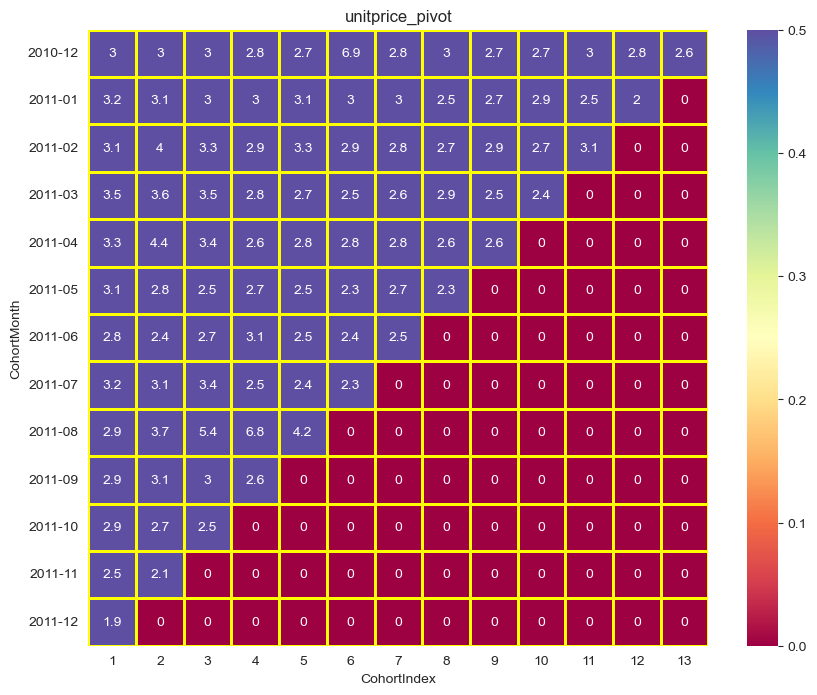

In [103]:
# unitprice_pivot

plt.figure(figsize=(10, 8))
plt.title('unitprice_pivot')
sns.heatmap(data = unitprice_pivot,
annot = True,
vmin = 0.0,
vmax = 0.5,
cmap = "Spectral", 
        linecolor='yellow', linewidth=2)
plt.show()


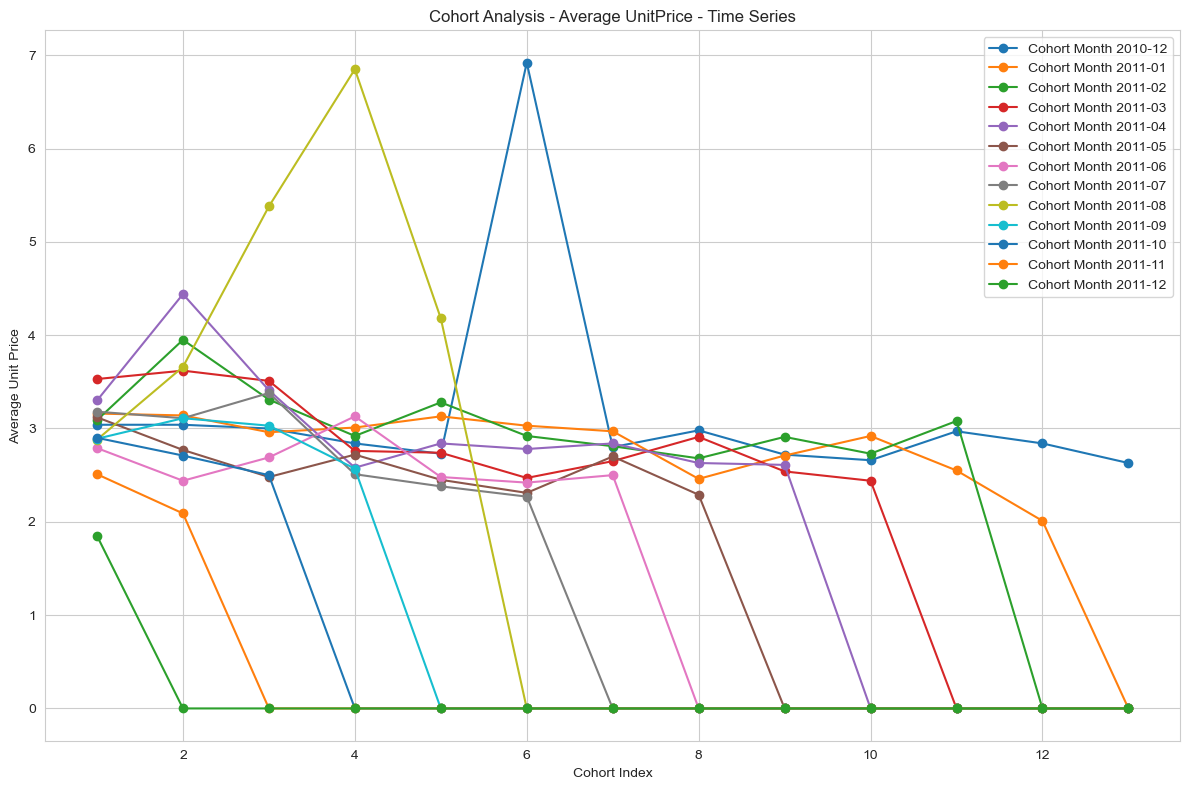

In [83]:
# Example using Pandas and Matplotlib
plt.figure(figsize=(12, 8))
for cohort_month, values in unitprice_pivot.iloc[:20, :20].iterrows():
    plt.plot(unitprice_pivot.iloc[:20, :20].columns, values, marker='o', label=f'Cohort Month {cohort_month}')

plt.title('Cohort Analysis - Average UnitPrice - Time Series')
plt.xlabel('Cohort Index')
plt.ylabel('Average Unit Price')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


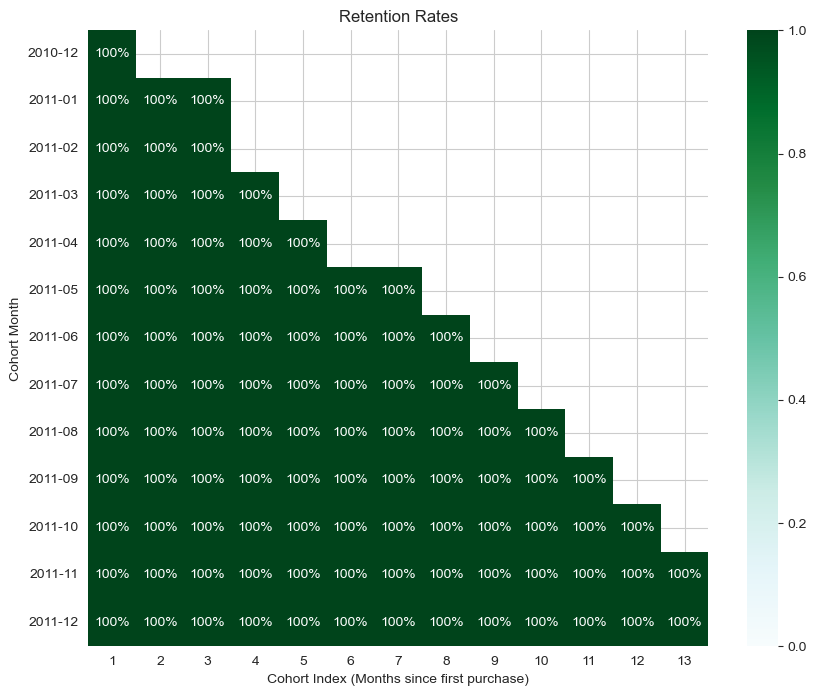

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
# Ensure your 'InvoiceDate' is in datetime format
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

# Extract CohortMonth and CohortIndex
online['CohortMonth'] = online['InvoiceDate'].dt.to_period('M')
online['CohortIndex'] = \
((online['InvoiceDate'] - 
online.groupby('CustomerID')['InvoiceDate'].transform('min')).dt.days // 30) + 1

# Group by CohortMonth and CohortIndex and count unique customers
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create the cohort counts pivot table
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', 
                                  values='CustomerID', aggfunc='count')

# Calculate cohort sizes
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Plot the retention heatmap
plt.figure(figsize=(10, 8))
plt.title('Retention Rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn')
plt.xlabel('Cohort Index (Months since first purchase)')
plt.ylabel('Cohort Month')
plt.show()
